## Importation des librairies

In [15]:
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram

## Création du circuit

4 qbit pour les participant
4 qbit pour les raisonnements de chaque participants

/Users/jimmy/ESGI/Deep/venv/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


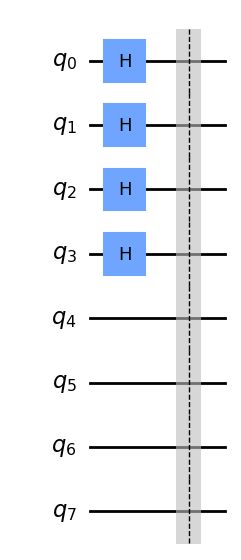

In [16]:
circ = QuantumCircuit(8)
circ.h(0) # Alice
circ.h(1) # Bob
circ.h(2) # Charlie
circ.h(3) # Dahlia
circ.barrier()

circ.draw('mpl')

Le calcul d'Alice est consigné dans le qbit n°4

In [17]:
circ.cx(4, 1)
circ.cx(4, 2)
circ.cx(4, 3)
circ.barrier()

Bob, Charlie et Dalia gardent les résultats dans leurs qbit de raisonnement respectif

In [18]:
circ.cx(4, 5)
circ.cx(4, 6)
circ.cx(4, 7)
circ.barrier()

Bob fait sa deduction

In [19]:
circ.cx(2, 5)
circ.cx(3, 5)
circ.barrier()

Charlie et Dalia gardent son résultat

In [20]:
circ.cx(5, 6)
circ.cx(5, 7)
circ.barrier()

Charlie note la couleur de la chevelure devant lui, et l'annonce

In [21]:
circ.cx(3, 6)
circ.barrier()

In [22]:
circ.cx(6, 7)

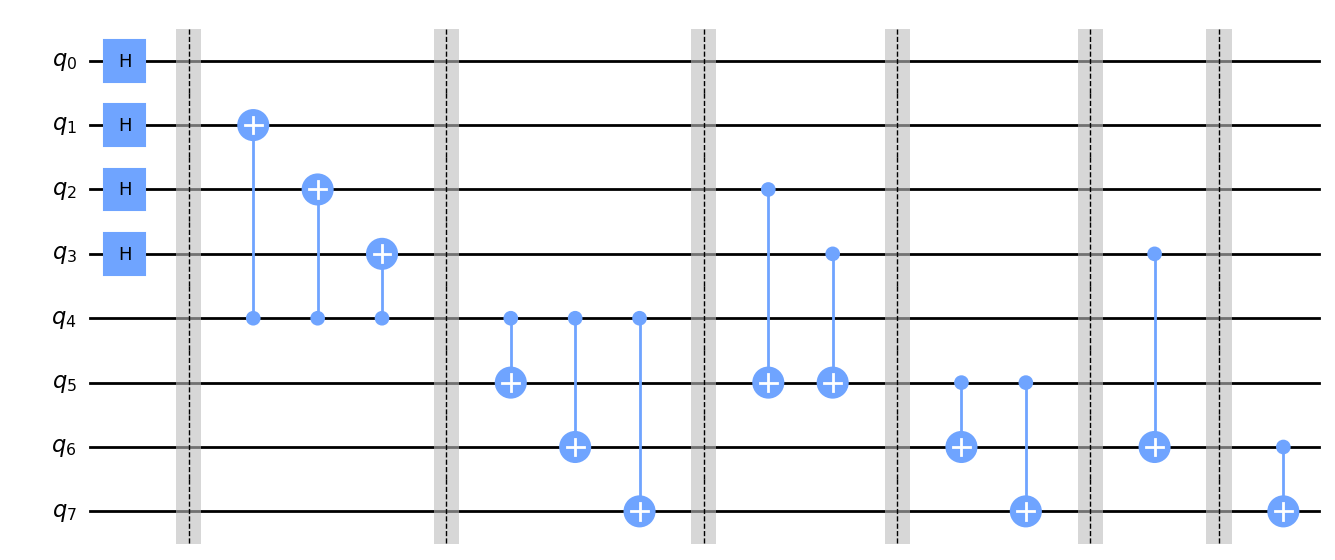

In [23]:
circ.draw("mpl")

## Simulation

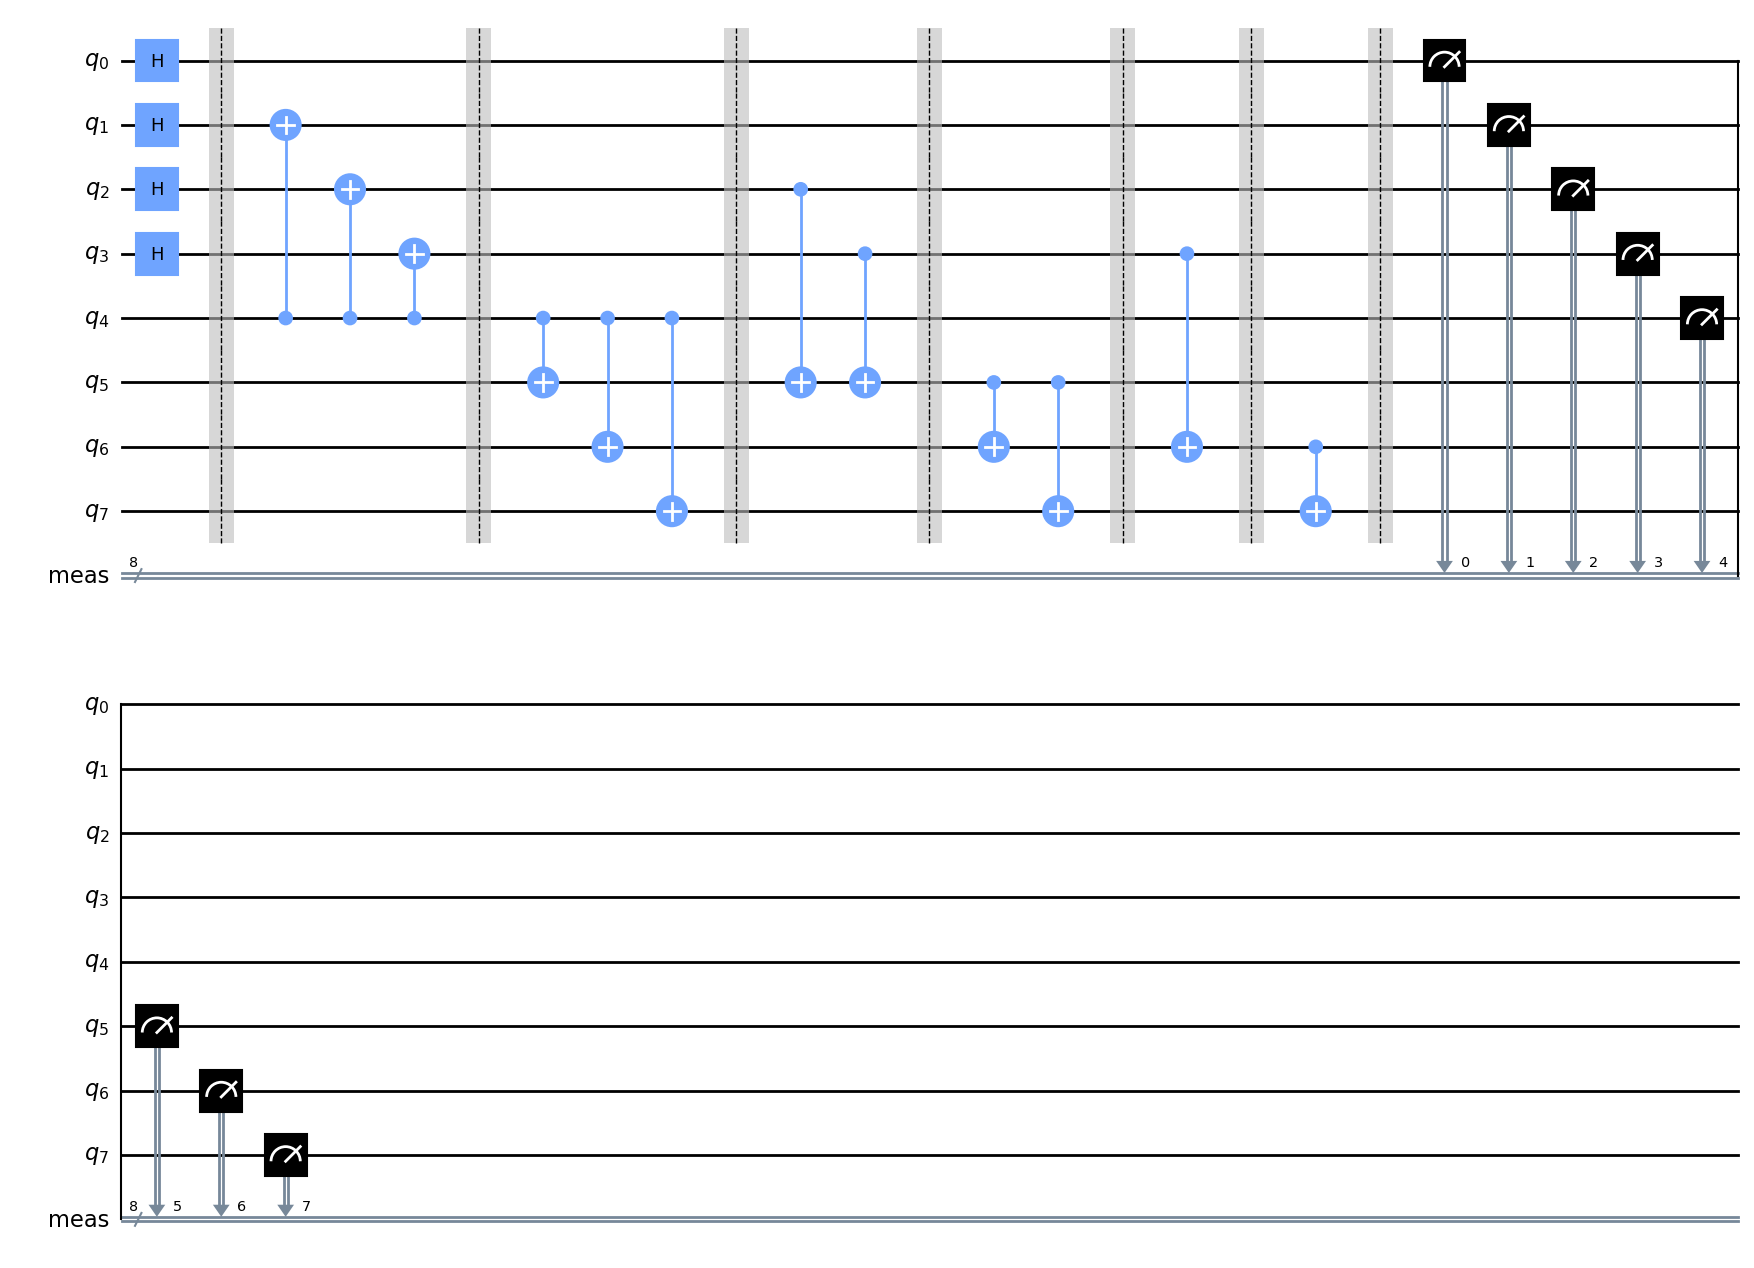

In [24]:
circ.measure_all()
circ.draw('mpl')

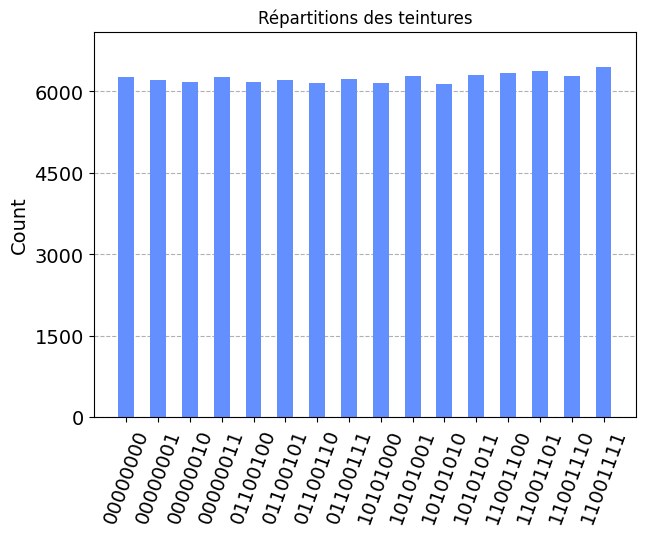

In [25]:
simulator = Aer.get_backend('aer_simulator') 
# On exécute le circuit sur le simulateur
circ = transpile(circ, simulator)
result = simulator.run(circ, shots=100_000).result()

counts = result.get_counts(circ)
plot_histogram(counts, title='Répartitions des teintures', bar_labels=False)